<a href="https://colab.research.google.com/github/Yash87015/YASH/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#logistic regression
#import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
#load
iris=load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#data frame
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
#add target
df['target']=iris.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#for binary clsssification only two calss nedded so we feeted out
df=df[df['target']!=2]

In [ ]:
#target unique
df['target'].unique()

array([0, 1])

In [ ]:
#nan value
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


sepal length (cm)


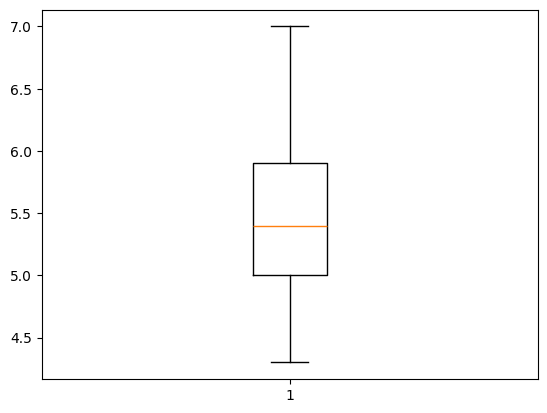

sepal width (cm)


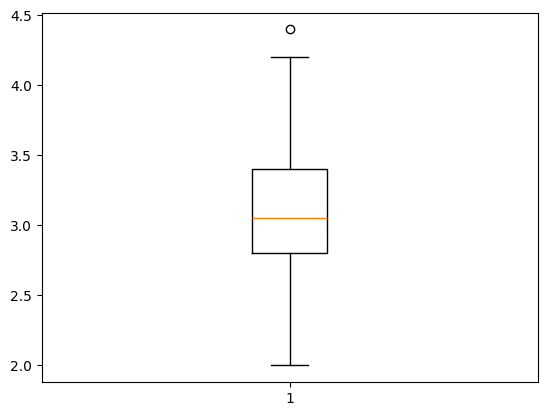

petal length (cm)


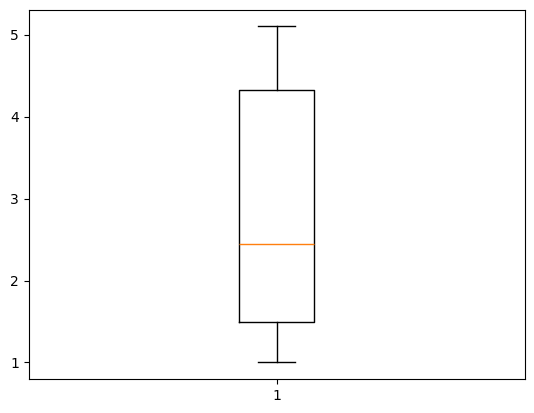

petal width (cm)


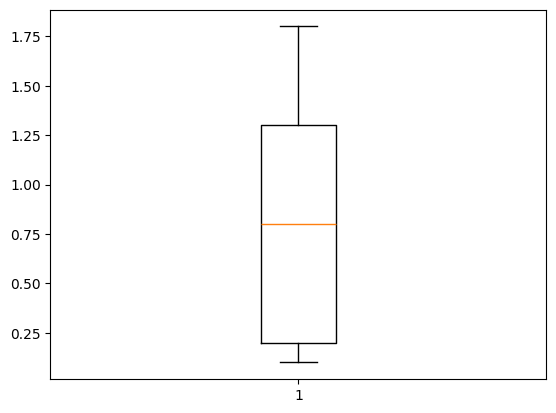

target


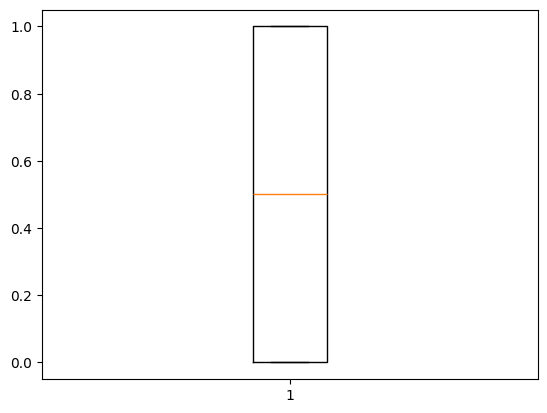

In [ ]:
#check outler to all feature
for col in df.columns:
    print(f'{col}')
    plt.boxplot(df[col])
    plt.show()

In [ ]:
#x and y
x=df.drop('target',axis=1)
y=df[['target']]

In [ ]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#shape all
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 4), (20, 4), (80, 1), (20, 1))

In [ ]:
#model training
model=LogisticRegression()

In [ ]:
#fit
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#predic
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
#proba x
y_pred_proba=model.predict_proba(x_test)

In [ ]:
y_pred_proba##corresponding to higher probability class is predicted, cutoff is 0.5

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [ ]:
#evalution metrix
confusion_matrix(y_test,y_pred)

array([[ 8,  0],
       [ 0, 12]])

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
claasigication_report12=classification_report(y_test,y_pred)

In [ ]:
print(claasigication_report12)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
#first two rows, 0 and 1 >> precision recall, f1 score and no of data points with respect to respective class
#macroavg >> for each class take simple avg>> avg precision of class 0 and class 1 will be macro average
#similarly for recall, f1 score
#support will be total no of datapoints

#weighted avg is used in case of class imbalance, it gives importance to performance of dominant class

In [ ]:
#roc and aoc
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [ ]:
#get predicted probabilities of class 1
y_pred_proba_class_1=y_pred_proba[:,1]

In [ ]:
y_pred_proba_class_1

array([0.95956738, 0.98953877, 0.01293241, 0.94559484, 0.8616652 ,
       0.02033869, 0.01795496, 0.96707768, 0.96619427, 0.99149484,
       0.97533966, 0.02484146, 0.99482163, 0.99761634, 0.9922547 ,
       0.01380658, 0.03402464, 0.05092174, 0.99264507, 0.02257023])

In [ ]:
#reciever operating characteristics curve
#inputs : y_test, y_pred_proba_class_1. It will return TPR, FPR with different cutoff of probabilities
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba_class_1)

In [ ]:
thresholds

array([       inf, 0.99761634, 0.8616652 , 0.01293241])

In [ ]:
fpr

array([0., 0., 0., 1.])

In [ ]:
tpr

array([0.        , 0.08333333, 1.        , 1.        ])

In [ ]:
roc_auc_score(y_test,y_pred_proba_class_1)

1.0

In [ ]:
roc_auc=auc(fpr,tpr)

In [ ]:
roc_auc

1.0

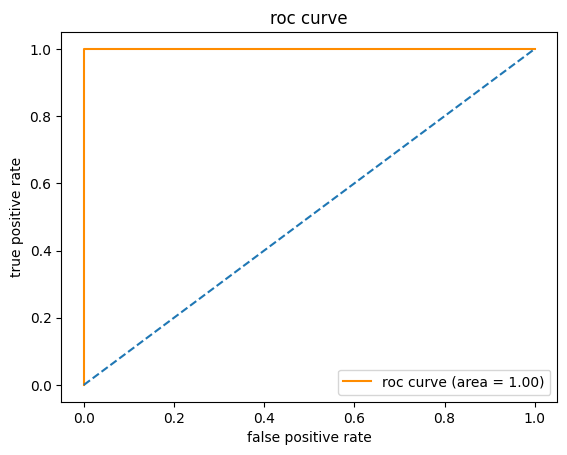

In [ ]:
#plot roc auc curve
plt.plot(fpr,tpr,label='roc curve (area = %0.2f)'%roc_auc,color='darkorange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc curve')
plt.legend()
plt.show()


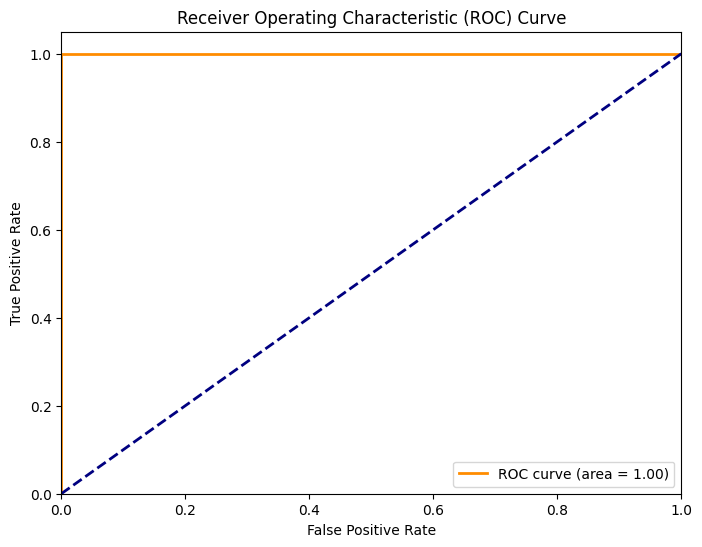

In [ ]:

plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()

In [ ]:
#cross validation >>
#Randomized search cv or grid search cv >> generic method with hyperparameter tuning
#Logistic Regression CV>> specific to logistic regression
#Kfold>> generic method only for cross validatiion

In [ ]:
#kfold
from sklearn.model_selection import KFold
cv=KFold(n_splits=5)

In [ ]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
#crosss val score
from sklearn.model_selection import cross_val_score
scorre=cross_val_score(model,x,y,cv=cv,scoring='accuracy',verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] END ................................ score: (test=1.000) total time=   0.0s


In [ ]:
scorre

array([1., 1., 1., 1., 1.])

In [ ]:
#make classification dataset
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=1,n_informative=5,n_redundant=5)

In [ ]:
x

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

In [ ]:
y

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [ ]:
len(y)

1000

In [ ]:
len(x)

1000

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 10), (300, 10), (700,), (300,))

In [ ]:
#model
model=LogisticRegression()

In [ ]:
#fit
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
#evalution matrix
confusion_matrix(y_test,y_pred)

array([[129,  13],
       [ 34, 124]])

In [ ]:
#accurasy score
accuracy_score(y_test,y_pred)

0.8433333333333334

In [ ]:
#classification report
classification_report12=classification_report(y_test,y_pred)

In [ ]:
print(classification_report12)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       142
           1       0.91      0.78      0.84       158

    accuracy                           0.84       300
   macro avg       0.85      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [ ]:
#aou-roc and curve
y_pred_proba=model.predict_proba(x_test)

In [ ]:
#only 1 class
y_pred_proba_class_1=y_pred_proba[:,1]

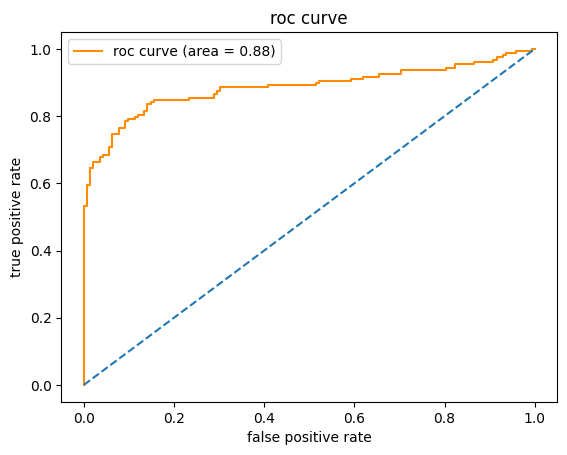

In [ ]:
#roc aou
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba_class_1)
roc_auc=auc(fpr,tpr)
#plot roc curve
plt.plot(fpr,tpr,label='roc curve (area = %0.2f)'%roc_auc,color='darkorange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc curve')
plt.legend()
plt.show()


In [ ]:
#precian - recall trade off
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,accuracy_score

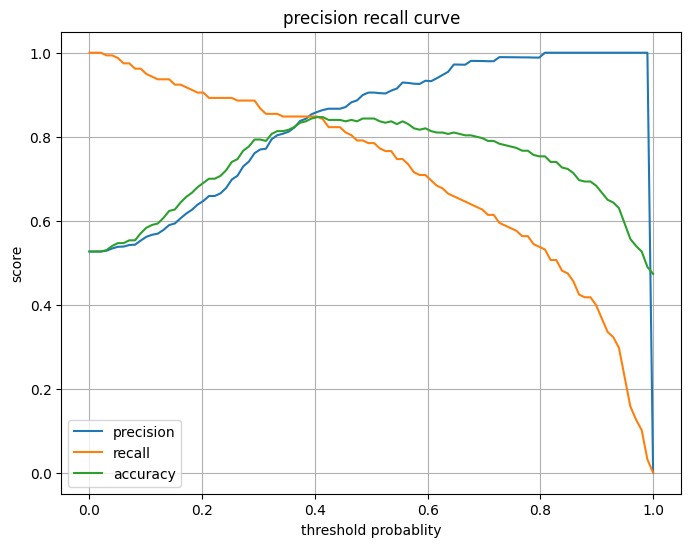

In [ ]:
#calculate precision recall acuurasy with difffernt thresold
thresholdss=np.linspace(0,1,100)
precisions=[]
recalls=[]
accuracies=[]
for threshold in thresholdss:
    y_pred=np.where(y_pred_proba_class_1>=threshold,1,0).astype(int)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
#plot
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(thresholdss,precisions,label='precision')
plt.plot(thresholdss,recalls,label='recall')
plt.plot(thresholdss,accuracies,label='accuracy')
plt.xlabel('threshold probablity')
plt.ylabel('score')
plt.title('precision recall curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#0.4 is my optimal tresold
new_pred_level=np.where(y_pred_proba_class_1>=0.4,1,0)

In [ ]:
accuracy_score(y_test,new_pred_level)

0.8433333333333334

In [ ]:
#confusion metrix
confusion_matrix(y_test,new_pred_level)

array([[119,  23],
       [ 24, 134]])

In [ ]:
#classification report
print(classification_report(y_test,new_pred_level))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       142
           1       0.85      0.85      0.85       158

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
#cross validataion
cv=KFold(n_splits=5)

In [ ]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
cross_val_score(model,x_train,y_train,cv=cv,scoring='accuracy',verbose=3)

[CV] END ................................ score: (test=0.786) total time=   0.0s
[CV] END ................................ score: (test=0.793) total time=   0.0s
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] END ................................ score: (test=0.843) total time=   0.0s
[CV] END ................................ score: (test=0.800) total time=   0.0s


array([0.78571429, 0.79285714, 0.8       , 0.84285714, 0.8       ])

In [ ]:
#logistic regression implemantation with hyperperameter tunning
#grid serch cv and randmiziserchcv
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
#make classifaction
x,y=make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=2,random_state=1)

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#hyper parameter tunnig
grid_param={'C':[1,2,10,20,30,40],
            'penalty':['l1','l2','elasticnet'],  # Changed to lowercase
            }
#model
model=LogisticRegression()
#grid serchcv
clf=GridSearchCV(model,grid_param,cv=5,scoring='accuracy',verbose=3)

In [ ]:
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [ ]:
#fit
clf.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.786 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.800 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.807 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.829 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.800 total time=   0.0s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=1, penalty=elasticne

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [ ]:
#best perameter
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
clf.best_score_

0.8042857142857145

In [ ]:
y_pred=clf.best_estimator_.predict(x_test)

In [ ]:
#accura score
accuracy_score(y_test,y_pred)

0.8433333333333334

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[129,  13],
       [ 34, 124]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       142
           1       0.91      0.78      0.84       158

    accuracy                           0.84       300
   macro avg       0.85      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [ ]:
#randomize serch cv
grid_param={'C':[1,2,10,20,30,40],
            'penalty':['l1','l2','elasticnet']}

clf_2=RandomizedSearchCV(model,grid_param,cv=5,scoring='accuracy',verbose=3)

In [ ]:
#fit
clf_2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ............C=10, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ............C=10, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ............C=10, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ............C=10, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ............C=10, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..................C=40, penalty=l2;, score=0.786 total time=   0.0s
[CV 2/5] END ..................C=40, penalty=l2;

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 2, 10, 20, 30, 40],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   scoring='accuracy', verbose=3)

In [ ]:
#best score
print(clf_2.best_score_)

0.8042857142857145


In [ ]:
print(clf_2.best_estimator_)

LogisticRegression(C=40)


In [ ]:
print(clf_2.best_params_)

{'penalty': 'l2', 'C': 40}


In [ ]:
#y_pred
y_pred=clf_2.best_estimator_.predict(x_test)

In [ ]:
#accuracy and cufusion mateix and classification report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8433333333333334
[[129  13]
 [ 34 124]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       142
           1       0.91      0.78      0.84       158

    accuracy                           0.84       300
   macro avg       0.85      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [ ]:
#multiclass classification
x,y=make_classification(n_samples=1000,n_features=10,n_classes=3,n_informative=5,n_redundant=5,random_state=1)

In [ ]:
y

array([1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1,

In [ ]:
#train test splt
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#ove(one verses rest)
#model
model=LogisticRegression(multi_class='ovr',solver='lbfgs')
#fit model
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1])

In [ ]:
#acccurasy
accuracy_score(y_test,y_pred)

0.6933333333333334

In [ ]:
#confusiom matrix
confusion_matrix(y_test,y_pred)

array([[75, 21,  3],
       [10, 58, 21],
       [23, 14, 75]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        99
           1       0.62      0.65      0.64        89
           2       0.76      0.67      0.71       112

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



In [ ]:
#multinomial
model=LogisticRegression(multi_class='multinomial',solver='lbfgs')
#fit
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
#pred
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        99
           1       0.63      0.64      0.63        89
           2       0.74      0.70      0.72       112

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.68      0.68       300



In [ ]:
#using iris dataset
from sklearn.datasets import load_iris

In [ ]:
data=load_iris()

In [ ]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#convert data frame
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df['Target']=data.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#x and y
x=df.drop('Target',axis=1)
y=df[['Target']]

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#model
model=LogisticRegression(max_iter=300)
#fit
model.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [ ]:
#pred
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
#accurasy
accuracy_score(y_test,y_pred)

0.9666666666666667

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

